using a neural network to detect a digit 0~9

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten
from tensorflow.keras.losses import BinaryCrossentropy , SparseCategoricalCrossentropy
from tensorflow.keras.datasets import mnist
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

looding the data

In [2]:
(x_train , y_train) ,( x_test , y_test) = mnist.load_data()
#print(x_train[:3])
#print(x_train.shape)
#print(y_train.shape)
#print(y_train[:3])
#print(x_test.shape)
#print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


filtering the data to just use 1,0 digit samples

In [3]:
x_train=x_train/255.0
x_test=x_test/255.0
y_train=y_train.astype(np.float32)
y_test=y_test.astype(np.float32)
print(np.unique(y_train))
print(np.unique(y_test))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


**flatten the 3d matrix into a 1d vector**

In [4]:
print("Label counts:", np.bincount(y_train.astype(int)))
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_train min/max:", x_train.min(), x_train.max())
print("unique labels:", np.unique(y_train))


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Label counts: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [10]:
tf.random.set_seed(1234)
model=Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(150,activation='relu',name="layer_1"),
    Dense(100,activation='relu',name="layer_2"),
    Dense(64,activation='relu',name="layer_3"),
    Dense(32,activation='relu',name="layer_4"),
    Dense(10,activation='softmax',name="layer_5")
]

)
model.compile(

    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'] ,
    optimizer='adam'

)
model.fit(x_train , y_train , epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8650 - loss: 0.4414
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9644 - loss: 0.1157
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0780
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0599
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9841 - loss: 0.0498
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9882 - loss: 0.0371
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0349
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9885 - loss: 0.0326
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9923 - loss: 0.0235
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9915 - loss: 0.0275


In [16]:
print(x_test.shape)
model.evaluate(x_test , y_test)
predicted=np.argmax(model.predict(x_test),axis=1)
print(f"the number of wrong predicted is {(y_test != predicted).sum()} from {len(y_test)}")

(10000, 28, 28)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9680 - loss: 0.1473
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step
the number of wrong predicted is 280 from 10000


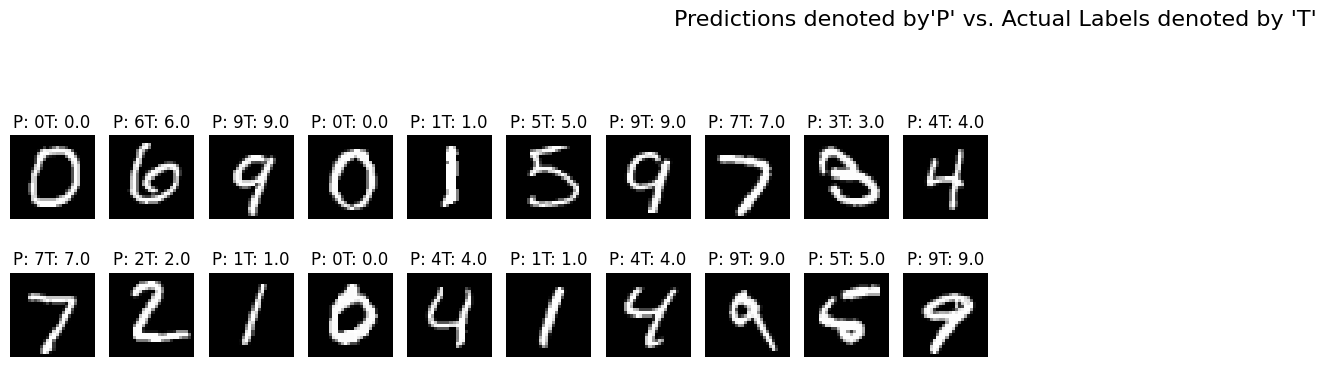

In [29]:
import matplotlib.pyplot as plt

# How many to show
n = 20
plt.figure(figsize=(20, 6))

for i in range(n):
    if i <=9:

       plt.subplot(1, n, i + 1)
    else:
      plt.subplot(2,n,i-9)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f"P: {predicted[i]}T: {y_test[i]}")
plt.suptitle("Predictions denoted by'P' vs. Actual Labels denoted by 'T'", fontsize=16)
plt.tight_layout()
plt.show()